In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [4]:
data = pd.read_csv('/Users/shiva/Downloads/vehicle.csv')

In [5]:
data[1:6]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus


In [6]:
data.shape

(846, 19)

Rename the columns

In [7]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [8]:
data['pr_axis_aspect_ratio'] = data['pr.axis_aspect_ratio'] 
data['max_length_aspect_ratio'] = data['max.length_aspect_ratio']
data['pr_axis_rectangularity'] = data['pr.axis_rectangularity'] 
data['max_length_rectangularity'] = data['max.length_rectangularity'] 
data['scaled_variance_1'] = data['scaled_variance.1']
data['scaled_radius_of_gyration_1'] = data['scaled_radius_of_gyration.1'] 
data['skewness_about_1'] = data['skewness_about.1']
data['skewness_about_2'] = data['skewness_about.2'] 
data['tclass'] = data['class'] 

In [9]:
data.drop(columns=['pr.axis_aspect_ratio','max.length_aspect_ratio','pr.axis_rectangularity','max.length_rectangularity','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about.1','skewness_about.2','class'],inplace=True)

In [10]:
print (data.columns)
print (data.shape)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio', 'elongatedness', 'scaled_variance',
       'scaled_radius_of_gyration', 'skewness_about', 'hollows_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio',
       'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_1', 'scaled_radius_of_gyration_1', 'skewness_about_1',
       'skewness_about_2', 'tclass'],
      dtype='object')
(846, 19)


Check for Outliers

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: Runti

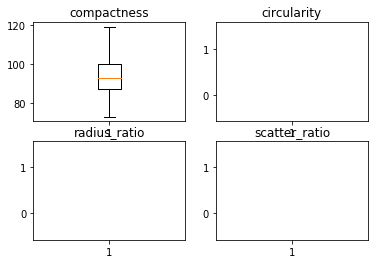

In [11]:
#sb.boxplot(data.compactness)

plt.subplot(2,2,1)
plt.boxplot(data.compactness)
plt.title('compactness')


plt.subplot(2,2,2)
plt.boxplot(data.circularity)
plt.title('circularity')


plt.subplot(2,2,3)
plt.boxplot(data.radius_ratio)
plt.title('radius_ratio')

plt.subplot(2,2,4)
plt.boxplot(data.scatter_ratio)
plt.title('scatter_ratio')

plt.show()

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: Runti

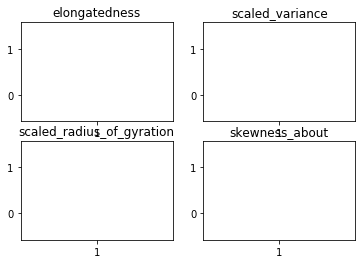

In [12]:
plt.subplot(2,2,1)
plt.boxplot(data.elongatedness)
plt.title('elongatedness')


plt.subplot(2,2,2)
plt.boxplot(data.scaled_variance_1)
plt.title('scaled_variance')


plt.subplot(2,2,3)
plt.boxplot(data.scaled_radius_of_gyration_1)
plt.title('scaled_radius_of_gyration')

plt.subplot(2,2,4)
plt.boxplot(data.skewness_about_1)
plt.title('skewness_about')

plt.show()

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: Runti

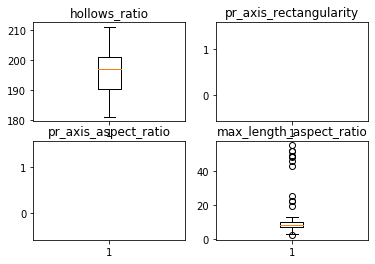

In [13]:

plt.subplot(2,2,1)
plt.boxplot(data.hollows_ratio)
plt.title('hollows_ratio')


plt.subplot(2,2,2)
plt.boxplot(data.pr_axis_rectangularity)
plt.title('pr_axis_rectangularity')


plt.subplot(2,2,3)
plt.boxplot(data.pr_axis_aspect_ratio)
plt.title('pr_axis_aspect_ratio')

plt.subplot(2,2,4)
plt.boxplot(data.max_length_aspect_ratio)
plt.title('max_length_aspect_ratio')

plt.show()

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: Runti

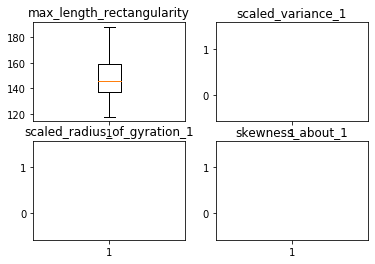

In [14]:
plt.subplot(2,2,1)
plt.boxplot(data.max_length_rectangularity)
plt.title('max_length_rectangularity')


plt.subplot(2,2,2)
plt.boxplot(data.scaled_variance_1)
plt.title('scaled_variance_1')


plt.subplot(2,2,3)
plt.boxplot(data.scaled_radius_of_gyration_1)
plt.title('scaled_radius_of_gyration_1')

plt.subplot(2,2,4)
plt.boxplot(data.skewness_about_1)
plt.title('skewness_about_1')


plt.show()

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 1.0, 'skewness_about_2')

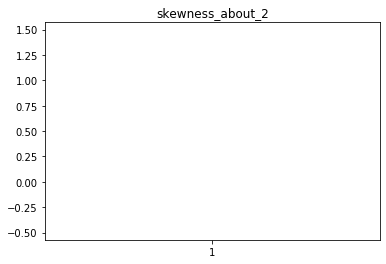

In [15]:
plt.boxplot(data.skewness_about_2)
plt.title('skewness_about_2')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


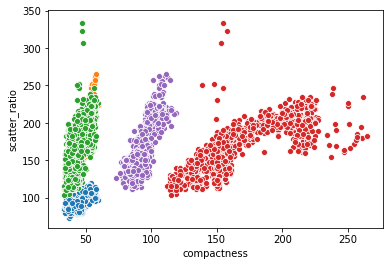

In [16]:
print (sb.scatterplot(data.circularity,data.compactness))
print (sb.scatterplot(data.circularity,data.scatter_ratio))
print (sb.scatterplot(data.circularity,data.radius_ratio))
print (sb.scatterplot(data.scatter_ratio,data.radius_ratio))
print (sb.scatterplot(data.compactness,data.scatter_ratio))

Circularity and Scatter_ratio are positively correlated\
Circularity and Compactness are mildly correlated\
Circularity and radius_ratio are mildly correlated\
Scatter_ratio and radius_ratio are positively correlated\
Compactness and scatter_ratio are positively correlated

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


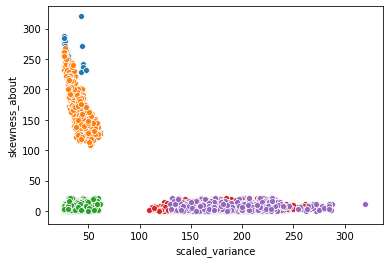

In [17]:
print (sb.scatterplot(data.elongatedness,data.scaled_variance))
print (sb.scatterplot(data.elongatedness,data.scaled_radius_of_gyration))
print (sb.scatterplot(data.elongatedness,data.skewness_about))
print (sb.scatterplot(data.scaled_radius_of_gyration,data.skewness_about))
print (sb.scatterplot(data.scaled_variance,data.skewness_about))

Elongatedness and scaled_variance are negatively correlated\
Elongatedness and scaled_radius_of_gyration are negatively correlated\
Elongatedness and skewness_about are not linearly correlated\
scaled_radius_of_gyration and skewness_about are not linearly correlated\
scaled_variance and skewness_about are not linearlycorrelated

In [18]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_1,scaled_radius_of_gyration_1,skewness_about_1,skewness_about_2
count,846.000000,841.000000,842.000000,840.000000,845.000000,845.000000,843.000000,844.000000,840.000000,846.000000,844.000000,846.000000,843.000000,846.000000,844.000000,842.000000,845.000000,845.000000
mean,93.678487,44.828775,82.110451,168.888095,168.901775,40.933728,188.631079,174.709716,6.364286,195.632388,61.678910,8.567376,20.582444,147.998818,439.494076,72.447743,12.602367,188.919527
std,8.234474,6.152172,15.778292,33.520198,33.214848,7.816186,31.411004,32.584808,4.920649,7.438797,7.891463,4.601217,2.592933,14.515652,176.666903,7.486190,8.936081,6.155809
min,73.000000,33.000000,40.000000,104.000000,112.000000,26.000000,130.000000,109.000000,0.000000,181.000000,47.000000,2.000000,17.000000,118.000000,184.000000,59.000000,0.000000,176.000000
25%,87.000000,40.000000,70.000000,141.000000,147.000000,33.000000,167.000000,149.000000,2.000000,190.250000,57.000000,7.000000,19.000000,137.000000,318.000000,67.000000,5.000000,184.000000
50%,93.000000,44.000000,80.000000,167.000000,157.000000,43.000000,179.000000,173.500000,6.000000,197.000000,61.000000,8.000000,20.000000,146.000000,363.500000,71.500000,11.000000,188.000000
75%,100.000000,49.000000,98.000000,195.000000,198.000000,46.000000,217.000000,198.000000,9.000000,201.000000,65.000000,10.000000,23.000000,159.000000,587.000000,75.000000,19.000000,193.000000
max,119.000000,59.000000,112.000000,333.000000,265.000000,61.000000,320.000000,268.000000,22.000000,211.000000,138.000000,55.000000,29.000000,188.000000,1018.000000,135.000000,41.000000,206.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
scaled_variance                843 non-null float64
scaled_radius_of_gyration      844 non-null float64
skewness_about                 840 non-null float64
hollows_ratio                  846 non-null int64
pr_axis_aspect_ratio           844 non-null float64
max_length_aspect_ratio        846 non-null int64
pr_axis_rectangularity         843 non-null float64
max_length_rectangularity      846 non-null int64
scaled_variance_1              844 non-null float64
scaled_radius_of_gyration_1    842 non-null float64
skewness_about_1               845 non-null float64
skewness_about_2   

Checking for Missing data

In [20]:
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
scatter_ratio                  1
elongatedness                  1
scaled_variance                3
scaled_radius_of_gyration      2
skewness_about                 6
hollows_ratio                  0
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance_1              2
scaled_radius_of_gyration_1    4
skewness_about_1               1
skewness_about_2               1
tclass                         0
dtype: int64

In [21]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
scatter_ratio                  1
elongatedness                  1
scaled_variance                3
scaled_radius_of_gyration      2
skewness_about                 6
hollows_ratio                  0
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance_1              2
scaled_radius_of_gyration_1    4
skewness_about_1               1
skewness_about_2               1
tclass                         0
dtype: int64

Clean up the data

In [22]:
cols_list = ['circularity','distance_circularity','radius_ratio','pr_axis_aspect_ratio','scatter_ratio','elongatedness','pr_axis_rectangularity',
            'max_length_rectangularity','pr_axis_rectangularity','scaled_variance','scaled_variance_1','scaled_radius_of_gyration',
            'scaled_radius_of_gyration_1','skewness_about','skewness_about_1','skewness_about_2']

for i in cols_list:
    data[i].fillna(data[i].median(),inplace=True)

Label encoding for the 'Class' feature

In [23]:
le = LabelEncoder()
data['tclass'] = le.fit_transform(data['tclass'])

In [24]:
data['tclass'].value_counts()

1    429
0    218
2    199
Name: tclass, dtype: int64

Train and Test data split

In [25]:
X = data.drop(columns=['scaled_radius_of_gyration_1','skewness_about_1','scaled_variance_1'])
y = data.tclass

In [26]:
X

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,pr_axis_rectangularity,max_length_rectangularity,skewness_about_2,tclass
0,95,48.0,83.0,178.0,162.0,42.0,176.0,184.0,6.0,197,72.0,10,20.0,159,187.0,2
1,91,41.0,84.0,141.0,149.0,45.0,170.0,158.0,9.0,199,57.0,9,19.0,143,189.0,2
2,104,50.0,106.0,209.0,207.0,32.0,223.0,220.0,14.0,196,66.0,10,23.0,158,188.0,1
3,93,41.0,82.0,159.0,144.0,46.0,160.0,127.0,6.0,207,63.0,9,19.0,143,199.0,2
4,85,44.0,70.0,205.0,149.0,45.0,241.0,188.0,9.0,183,103.0,52,19.0,144,180.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,169.0,40.0,200.0,149.0,7.0,195,64.0,8,20.0,134,188.0,1
842,89,46.0,84.0,163.0,159.0,43.0,173.0,176.0,1.0,197,66.0,11,20.0,159,186.0,2
843,106,54.0,101.0,222.0,222.0,30.0,228.0,200.0,3.0,201,67.0,12,25.0,173,187.0,1
844,86,36.0,78.0,146.0,135.0,50.0,155.0,148.0,0.0,195,58.0,7,18.0,124,190.0,1


In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=10)

In [103]:
mdl_svc = LinearSVR()

In [107]:
mdl_svc.score(X_train,y_train)

0.522093277962515

In [108]:
y_pred = mdl_svc.predict(X_test)

Scaling for the data

In [136]:
from scipy.stats import zscore
XScaled=X_train.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,pr_axis_rectangularity,max_length_rectangularity,skewness_about_2,tclass
285,-0.566684,0.493316,0.171745,0.562915,-0.007735,-0.240476,-0.030537,0.442823,-0.128326,0.708351,0.261990,-0.137587,-0.233562,0.323542,0.981430,0.014532
379,1.336056,1.793452,0.994752,1.145818,1.428903,-1.260074,1.130709,1.232618,-0.928000,0.439799,0.261990,0.462794,1.302758,1.698043,-0.154934,0.014532
816,-0.447763,0.493316,0.171745,-0.369730,-0.247175,0.269324,-0.438542,0.321316,-0.728081,-0.097305,0.261990,0.462794,-0.233562,1.285693,-0.641947,1.448405
33,0.860371,0.493316,1.564526,1.524705,1.159534,-1.132625,1.350404,0.868097,-0.328244,0.842627,0.747051,0.262667,1.302758,0.392267,0.169742,0.014532
126,-0.566684,-0.481786,-0.777878,-0.632036,-0.666195,0.524224,-0.407157,-0.681116,-0.928000,-0.902960,0.019460,-0.337715,-0.617642,-0.363709,-0.479609,-1.419340


In [137]:
XScaled_test=X_test.apply(zscore)
XScaled_test.head()

,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,pr_axis_rectangularity,max_length_rectangularity,skewness_about_2,tclass
565,0.965567,0.577721,0.214108,0.774061,0.213923,-0.395514,0.142292,0.442782,-0.154434,1.970722,-0.187546,0.778979,0.190145,0.395300,1.333953,0.072004
354,0.580553,0.907477,0.535142,0.806293,0.275251,-0.525140,0.242040,0.759946,0.935182,0.754450,0.245515,0.204637,0.190145,0.534367,0.680483,0.072004
827,0.708891,2.061621,1.177212,0.322822,1.716454,-1.432525,1.173024,1.267410,-0.372357,0.349026,-1.053669,1.353320,1.760769,2.828968,-0.626456,0.072004
636,0.323877,-0.576423,-0.813204,-0.450732,-0.828650,0.771124,-0.855191,-0.128115,1.153105,1.835581,-0.764961,-0.369704,-0.987824,-0.439101,2.150791,0.072004
418,-0.831166,-0.246668,-0.748997,0.064970,-0.491347,0.382245,-0.356450,-0.064682,0.063489,-1.137528,1.544699,-0.369704,-0.595168,-0.160967,-0.789824,-1.334837


In [138]:
print (XScaled.shape)
print (XScaled_test.shape)

(592, 16)
(254, 16)


In [85]:
mdl = PCA(n_components=9)

In [86]:
X1 = scaled_data

In [139]:
mdl.fit(XScaled)
mdl.fit(XScaled_test)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [140]:
print (mdl.explained_variance_)

[8.47775065 2.5105446  1.57419502 1.33307738 0.89486095 0.43124796
 0.3145268  0.21265516 0.10123157]


In [141]:
print (mdl.explained_variance_ratio_)

[0.52777335 0.15629129 0.09799984 0.08298932 0.05570862 0.02684688
 0.01958053 0.01323862 0.00630206]


In [142]:
print (mdl.components_)

[[ 0.28684011  0.30887316  0.31959639  0.28259367  0.33407014 -0.33178204
   0.32825376  0.28234459  0.06214013  0.07770684  0.07655445  0.12453013
   0.33059017  0.28860882  0.03760592 -0.07681605]
 [-0.1284317   0.1830504  -0.07010657 -0.28128273  0.05821085  0.01327394
   0.03355484  0.26004789 -0.0691355  -0.5646     -0.28376096 -0.08772122
   0.08020543  0.18443884 -0.57977299 -0.07274558]
 [-0.23829394 -0.04322865 -0.10587163  0.20185634 -0.02551634 -0.03074109
   0.0861984   0.01324711 -0.40676602 -0.18428612  0.58813425  0.30077988
  -0.04604491 -0.11574774 -0.12911175 -0.46066564]
 [-0.06373556  0.13342589  0.00428073 -0.02053986 -0.12846611  0.15663297
  -0.12581447  0.08357923  0.19852128  0.01609819  0.24274855  0.65038455
  -0.11104244  0.22915657 -0.18056497  0.5429542 ]
 [-0.02149289  0.05579933 -0.15948507  0.02709223 -0.08040954  0.05924236
  -0.05892473  0.18142133  0.82813004 -0.12587597  0.23735013 -0.08593656
  -0.08382277 -0.02098606  0.05051301 -0.38537165]
 [ 0.

In [143]:
print(mdl.explained_variance_ratio_)

[0.52777335 0.15629129 0.09799984 0.08298932 0.05570862 0.02684688
 0.01958053 0.01323862 0.00630206]


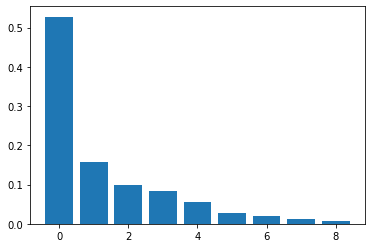

In [144]:
plt.bar(list(range(0,9)),mdl.explained_variance_ratio_,alpha=1, align='center')
plt.show()

Dimensionality Reduction


In [128]:
mdl6 = PCA(n_components=6)
mdl6.fit(XScaled)
print(mdl6.components_)
print(mdl6.explained_variance_ratio_)
Xmdl6 = mdl6.transform(XScaled)

[[ 0.28696014  0.31123288  0.31742664  0.28441413  0.3300578  -0.32912264
   0.32350394  0.29144143  0.03640428  0.07618165  0.0985451   0.10322407
   0.32620119  0.30286668  0.02948481 -0.07605304]
 [ 0.09289969 -0.11691751  0.04230329  0.27373699 -0.10048189  0.03482386
  -0.04788286 -0.20891709  0.03982187  0.54509226  0.35918031  0.25358708
  -0.11012079 -0.08872268  0.52613697  0.23427193]
 [-0.2363242   0.02897667 -0.09022938  0.14867209 -0.08184201  0.08387009
   0.08013589  0.06343437 -0.21740908 -0.28731505  0.52826517  0.58692547
  -0.08697389  0.03971595 -0.35539984  0.00868372]
 [-0.0953568  -0.14233538 -0.05819191  0.15743549  0.06871866 -0.14572683
   0.10420535 -0.11239589 -0.54366678  0.03314195  0.14533251 -0.22897442
   0.0376087  -0.2232761   0.1789698  -0.66295229]
 [-0.02754845 -0.0362993  -0.14554861  0.09726196 -0.04109997  0.00625534
   0.02358305  0.07676251  0.78285281 -0.11320168  0.23912716 -0.00608018
  -0.0580702  -0.13391495  0.06799639 -0.50028132]
 [ 0.

In [148]:
mdl6.fit(XScaled_test)
print(mdl6.components_)
print(mdl6.explained_variance_ratio_)
Xmdl6_Test = mdl6.transform(XScaled_test)

[[ 0.28684011  0.30887316  0.31959639  0.28259367  0.33407014 -0.33178204
   0.32825376  0.28234459  0.06214013  0.07770684  0.07655445  0.12453013
   0.33059017  0.28860882  0.03760592 -0.07681605]
 [-0.1284317   0.1830504  -0.07010657 -0.28128273  0.05821085  0.01327394
   0.03355484  0.26004789 -0.0691355  -0.5646     -0.28376096 -0.08772122
   0.08020543  0.18443884 -0.57977299 -0.07274558]
 [-0.23829394 -0.04322865 -0.10587163  0.20185634 -0.02551634 -0.03074109
   0.0861984   0.01324711 -0.40676602 -0.18428612  0.58813425  0.30077988
  -0.04604491 -0.11574774 -0.12911175 -0.46066564]
 [-0.06373556  0.13342589  0.00428073 -0.02053986 -0.12846611  0.15663297
  -0.12581447  0.08357923  0.19852128  0.01609819  0.24274855  0.65038455
  -0.11104244  0.22915657 -0.18056497  0.5429542 ]
 [-0.02149289  0.05579933 -0.15948507  0.02709223 -0.08040954  0.05924236
  -0.05892473  0.18142133  0.82813004 -0.12587597  0.23735013 -0.08593656
  -0.08382277 -0.02098606  0.05051301 -0.38537165]
 [ 0.

Support Vector and PCA

Train data

In [132]:
mdl_svc.fit(XScaled,y_train)
mdl_svc.score(XScaled,y_train)

0.9999999987891319

In [134]:
mdl_svc.fit(Xmdl6,y_train)
mdl_svc.score(Xmdl6,y_train)

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9516368447407538

Test data

In [145]:
mdl_svc.fit(XScaled_test,y_test)
mdl_svc.score(XScaled_test,y_test)

0.9999999996646355

In [150]:
mdl_svc.fit(Xmdl6_Test,y_test)
mdl_svc.score(Xmdl6_Test,y_test)

/Volumes/FastSSD/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8938164925740638